# Prétraitement des données

## Importer les bibliothèques

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

## Importer le jeu de données

In [2]:
data = pd.read_csv("https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/d51b9368-7437-420c-975c-81cac8790b68.csv", sep=',')
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## Encoding categorical data


### Encoding the Dependent Variable

In [94]:
df = data.copy()

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:, 1] = le.fit_transform(df.iloc[:, 1])
df.iloc[:, 4] = le.fit_transform(df.iloc[:, 4])
df.iloc[:, 5] = le.fit_transform(df.iloc[:, 5])

In [96]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


**sex:** 
- femme:0  
- homme:1

**smoker:** 
- no:0 
- yes:1

**region:**
- southwest:3 
- southeast:2 
- northwest:1 
- northeast:0

## Données manquantes



In [97]:
df.isnull().sum().sum()

0

In [98]:
# Data types
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

# Separation des Variables Independant et la variable dependant

In [99]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [100]:
X[:3]

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ]])

In [101]:
y[:3]

array([16884.92,  1725.55,  4449.46])

## Séparation d'entraînement et de test

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 1. Multiple Linear Regression

**NOTE:** Si vous utilisez la méthode **normale equation** pour trouver les coefs optimaux et intercepter, il n'est pas nécessaire d'utilisez **feature scaling**  bien que, si vous utilisez la **gradient descent**,c'est toujours importante pour obtenir un modèle qui fonctionne rapidement

L '«équation normale» est une méthode pour trouver le thêta optimal sans itération.

$\theta = (X^T X)^{-1}X^T y$

1. Linear Regression supprimera automatiquement l'une des variables **dummy** pour éviter le piège. 
2. On n'a pas besoin d'appliquer des methode comme **backward elimination** le model se chargera automatiquement de sélectionner les fonctionnalités statistiquement significatives lors de l'entraînement du modèle.

## Entraînement de la régression linéaire multiple

In [103]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)



## Prédiction sur les résultats de l'ensemble du test

In [104]:
y_pred = lin_reg.predict(X_test)
np.set_printoptions(precision=2)
y_pred_y_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(y_pred_y_test[:5])

[[ 4312.09  1646.43]
 [12859.5  11353.23]
 [12370.5   8798.59]
 [13549.55 10381.48]
 [  410.55  2103.08]]


Les prédictions et les valeurs vrais. 

## Évaluation des performances du modèle

In [105]:
accuracy = lin_reg.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))
print(r2_score(y_test, y_pred))

Accuracy = 0.762322402256339
0.762322402256339


## Obtenir l'équation de régression linéaire finale avec les valeurs des coefficients

In [15]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[  258.02  -244.32   315.08   412.24 23766.97  -330.63]
-11210.165734543403


# 2. Decision Tree Regression

## Séparation d'entraînement et de test




In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Entrainement du model sur le Training set





In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Prediction

In [18]:
y_pred = tree_reg.predict(X_test)
np.set_printoptions(precision=2)
y_pred_y_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(y_pred_y_test[:5])

[[ 1263.25  1646.43]
 [11842.62 11353.23]
 [ 8457.82  8798.59]
 [ 9800.89 10381.48]
 [ 1964.78  2103.08]]


## Evaluation du model

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7500328450750202

# 3. Random Forest Regression

## Séparation d'entraînement et de test


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Entrainement du model 

In [21]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Prédiction

In [22]:
y_pred = forest_reg.predict(X_test)
np.set_printoptions(precision=2)
y_pred_y_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(y_pred_y_test[:5])

[[11152.11  9724.53]
 [10264.08  8547.69]
 [44401.93 45702.02]
 [13274.34 12950.07]
 [10396.01  9644.25]]


## Evaluating the Model Performance

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.870401570321086

# Analyse 

In [24]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

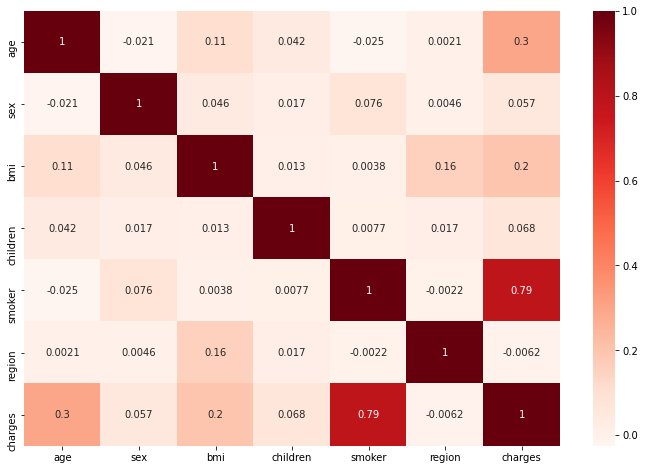

In [25]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
# Pour les features. On n'a pas des variables correlées entre eux 
# age, bmi et smoker ont plus de correlation avec charges 

Un box plot (appelé aussi une boîte à moustaches) est un graphique utilisé fréquemment pour l’exploration des données. Il permet de visualiser pour une variable ou pour un groupe d’individus le comportement global des individus.
Ce graphique est composé d’une boîte (box). Ses côtés supérieurs et inférieurs représentent les quartiles des données. Elle est coupée en deux par une ligne qui représente la médiane. De plus, des moustaches (des barres) se situent au dessus et en dessous de la boîte.
Reflète à la fois la tendance centrale et une idée de la distribution des données. Ce graphique est surtout intéressant lorsqu’on essaye de comparer des variables sur des échelles similaires ou lorsqu’on essaye de comparer des groupes d’individus sur la même variable.
Seaborn va nous permettre de le faire en utilisant la fonction sns. boxplot().
Par ailleurs, les losanges ajoutés sur le graphique sont les valeurs extrêmes, il s’agit des valeurs se trouvant au-delà des moustaches et qui méritent notre attention.


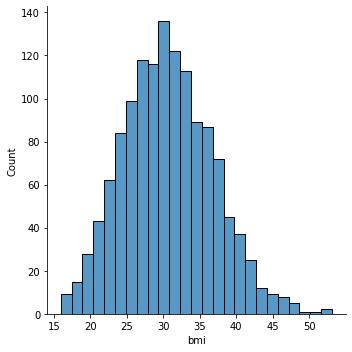

In [26]:
# Pour voir si la distribution de 'bmi' est normal ou pas 
sns.displot(df['bmi'])
plt.show()

- il a une distribution normal

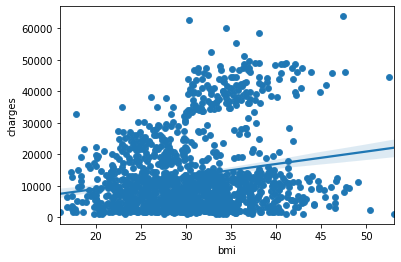

In [27]:
sns.scatterplot(x=df['bmi'],y=df['charges'])
sns.regplot(x=df['bmi'],y=df['charges'])
plt.show()

- BMI et les frais d'assurance sont un peu positivement corrélés,

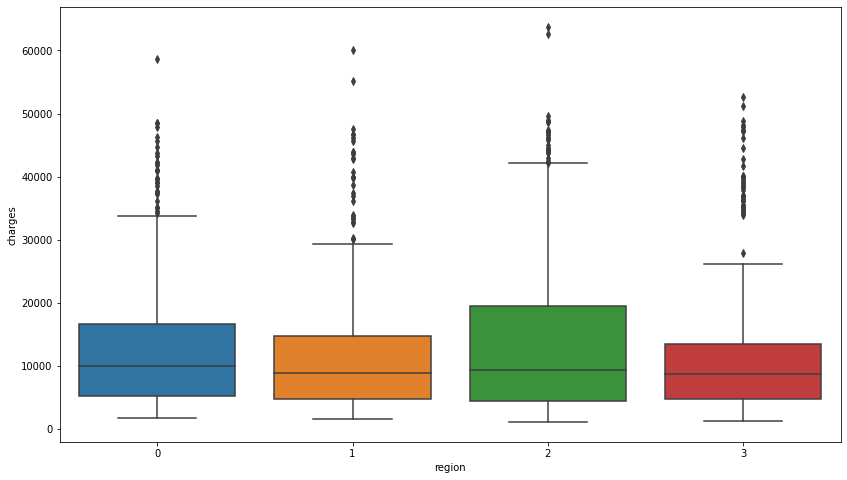

In [28]:
plt.figure(figsize=(14,8))
sns.boxplot(x="region", y="charges", data=df)
plt.show()

- il n'y a pas beaucoup de differences entre les region

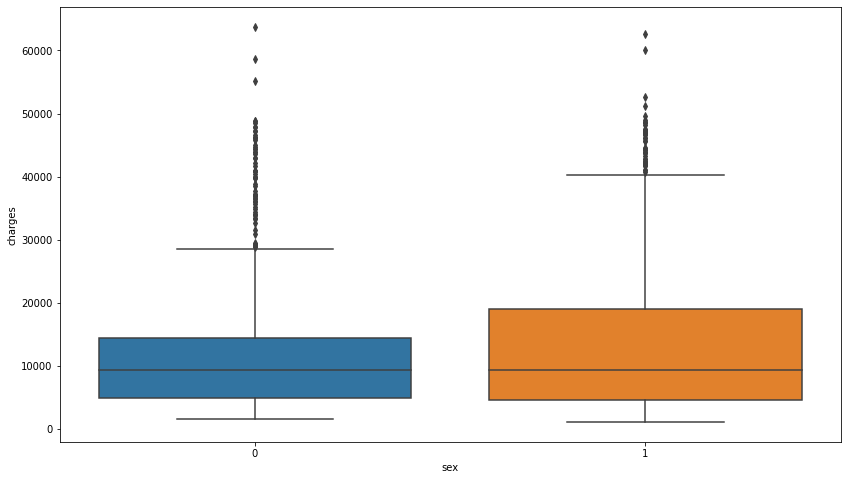

In [29]:
plt.figure(figsize=(14,8))
sns.boxplot(x="sex", y="charges", data=df)
plt.show()

- pour les 'sex' aussi 

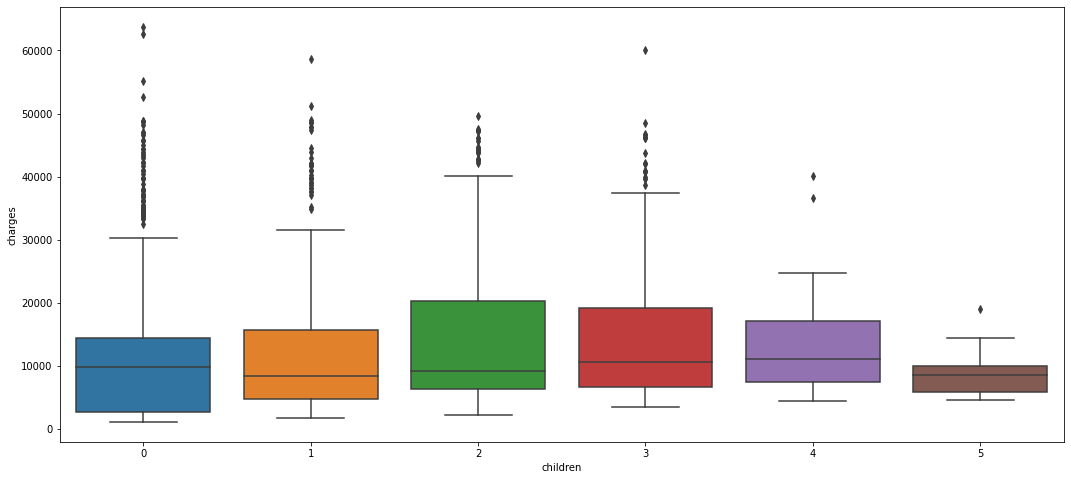

In [30]:
plt.figure(figsize=(18,8))
sns.boxplot(x="children", y="charges", data=df, )
plt.show()

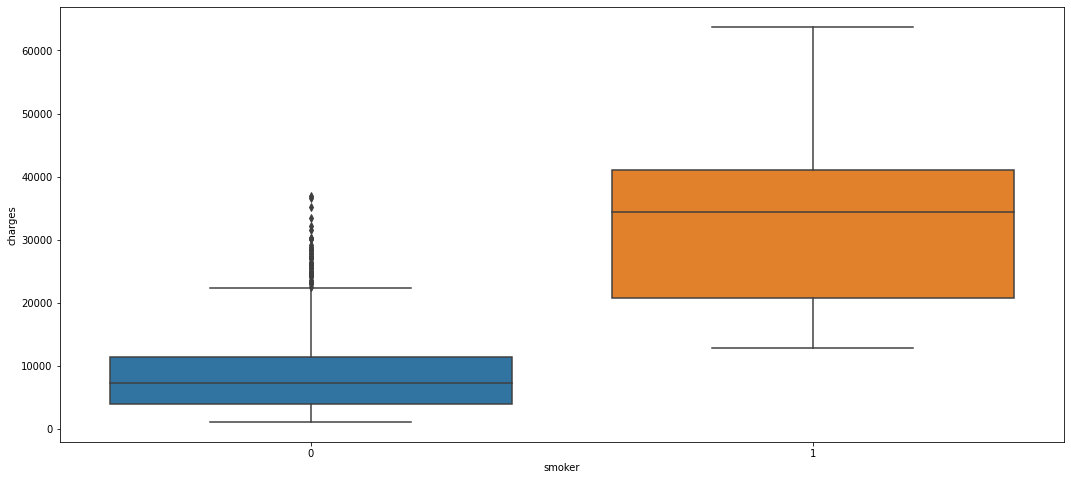

In [31]:
plt.figure(figsize=(18,8))
sns.boxplot(x="smoker", y="charges", data=df)
plt.show()

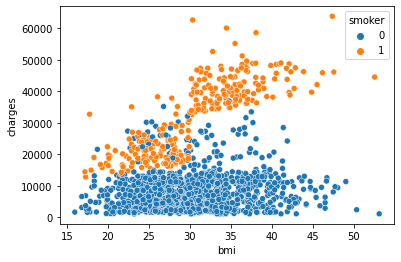

In [81]:
sns.scatterplot(y = 'charges', x = 'bmi', hue='smoker', data=df)
plt.show()

- les personnes qui ont 5 enfant ont tendance d'avoir moins de charges 

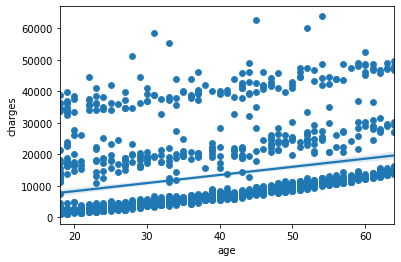

In [32]:
sns.scatterplot(x=df['age'],y=df['charges'])
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

- les personnes âgées ont tendance à payer un peu plus

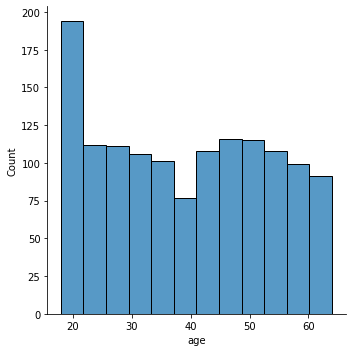

In [33]:
sns.displot(df['age'])
plt.show()

# Feature Engineering

- Pour generalize notre model, on peut faire des groupes pour certaines features 

In [144]:
df_1 = data.copy()

- Normallement on peut attendre que BMI aura plus de correlation avec des charges 
- On peut essayer de faire des groupes pour generalizer notre model 
- on peut faire 4 groupes

In [145]:
df_1.loc[df_1['bmi']<25, 'bmi_class'] = 1
df_1.loc[(df_1['bmi']<30) & (df_1['bmi']>=25), 'bmi_class'] = 2
df_1.loc[(df_1['bmi']<40) & (df_1['bmi']>=30), 'bmi_class'] = 3
df_1.loc[df_1['bmi']>=40, 'bmi_class'] = 4

- On peut faire la meme chose pour l'age
- 3 groupes

In [146]:
df_1.loc[(df_1['age']<31) & (df_1['age']>=18), 'age_class'] = 1
df_1.loc[(df_1['age']<51) & (df_1['age']>=31), 'age_class'] = 2
df_1.loc[df_1['age']>=51, 'age_class'] = 3

In [147]:
df_1 = df_1.drop(columns=['bmi', 'age'], axis=1)

In [148]:
df_1.head(1)

,sex,children,smoker,region,charges,bmi_class,age_class
0,female,0,yes,southwest,16884.924,2.0,1.0


In [149]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1.iloc[:, 0] = le.fit_transform(df_1.iloc[:, 0])
df_1.iloc[:, 2] = le.fit_transform(df_1.iloc[:, 2])
df_1.iloc[:, 3] = le.fit_transform(df_1.iloc[:, 3])

In [150]:
df_1.head(1)

,sex,children,smoker,region,charges,bmi_class,age_class
0,0,0,1,3,16884.924,2.0,1.0


In [151]:
X = df_1.drop(['charges'], axis=1).values
y = df_1['charges'].values

In [152]:
X[:3]

array([[0., 0., 1., 3., 2., 1.],
       [1., 1., 0., 2., 3., 1.],
       [1., 3., 0., 2., 3., 1.]])

In [153]:
y[:3]

array([16884.92,  1725.55,  4449.46])

# 2B. Decision Tree Regression Feature Importance

## Splitting the dataset into the Training set and Test set

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the Decision Tree Regression model on the Training set

In [155]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

Feature: 0, Score: 0.01014
Feature: 1, Score: 0.02332
Feature: 2, Score: 0.68020
Feature: 3, Score: 0.02042
Feature: 4, Score: 0.17409
Feature: 5, Score: 0.09183


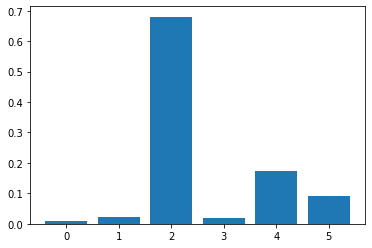

In [156]:
importance = tree_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

- **sex**, **children**, **region** ont pas beaucoup d'importance

## Predicting the Test set results

In [157]:
y_pred = tree_reg.predict(X_test)
np.set_printoptions(precision=2)
y_pred_y_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(y_pred_y_test[:5])

[[ 4436.44  1646.43]
 [13068.34 11353.23]
 [13485.35  8798.59]
 [ 7682.67 10381.48]
 [ 1901.01  2103.08]]


## Evaluating the Model Performance

In [158]:
#Test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8135668147080114

In [159]:
# Train set
y_pred_train = tree_reg.predict(X_train)
r2_score(y_train, y_pred_train)

0.9128386185703199

In [160]:
# Si on prends des tous les features sauf sex
X_import = X[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size = 0.2, random_state = 1)

tree_reg = DecisionTreeRegressor(random_state = 1)
tree_reg.fit(X_train, y_train)

y_pred_i = tree_reg.predict(X_test)
r2_score(y_test, y_pred_i)

0.8330058350063501

In [161]:
# Si on prends des features important (age_class, bmi_class, smoker)
X_import = X[:, (2,4,5)]

X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size = 0.2, random_state = 1)

tree_reg = DecisionTreeRegressor(random_state = 1)
tree_reg.fit(X_train, y_train)

y_pred_i = tree_reg.predict(X_test)
r2_score(y_test, y_pred_i)

0.8652905206441219

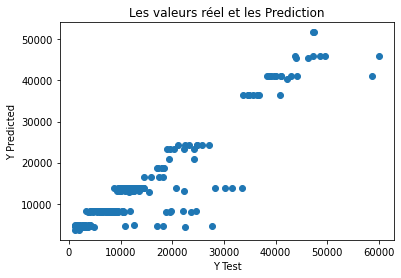

In [162]:
plt.scatter(y_test, y_pred_i)
plt.title('Les valeurs réel et les Prediction')
plt.xlabel("Y Test")
plt.ylabel("Y Predicted")
plt.show()

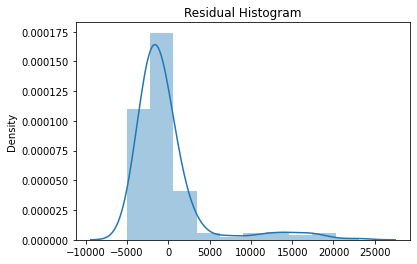

In [163]:
sns.distplot((y_test - y_pred_i), bins=10)
plt.title('Residual Histogram')
plt.show()

# 3B. Random Forest Regression Feature Importance

## Splitting the dataset into the Training set and Test set


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [165]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

Feature: 0, Score: 0.01466
Feature: 1, Score: 0.03152
Feature: 2, Score: 0.65271
Feature: 3, Score: 0.02576
Feature: 4, Score: 0.18161
Feature: 5, Score: 0.09374


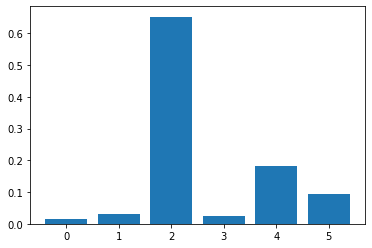

In [166]:
importance = forest_reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Predicting the Test set results

In [167]:
y_pred = forest_reg.predict(X_test)
np.set_printoptions(precision=2)
y_pred_y_test = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(y_pred_y_test[:5])

[[10454.74  9724.53]
 [ 6060.68  8547.69]
 [44211.97 45702.02]
 [12647.25 12950.07]
 [12515.01  9644.25]]


## Evaluating the Model Performance

In [168]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8570419900349099

In [169]:
# Si on prends des features important (age_class, bmi_class, smoker)
X_import = X[:, (2,4,5)]

X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size = 0.2, random_state = 1)

forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8652368176179308

In [170]:
# Si on prends des tous les features sauf sex
X_import = X[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size = 0.2, random_state = 1)

forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
r2_score(y_test, y_pred)

0.8400539532761145

# Amélioration
- Future Engineering
- Regularization
- Cross Validation
- Traitement des outlier
- Hyperparameter Optimization